In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
customer = pd.read_csv('marketing_campaign.csv', sep='\t')
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
missing_values = customer.isna().sum().to_dict()
missing_values = pd.DataFrame(list(missing_values.items()), columns=['Columns','Missing values'])
missing_values

,Columns,Missing values
0,ID,0
1,Year_Birth,0
2,Education,0
3,Marital_Status,0
4,Income,24
5,Kidhome,0
6,Teenhome,0
7,Dt_Customer,0
8,Recency,0
9,MntWines,0


In [5]:
customer = customer.dropna()
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [6]:
customer['Age'] = 2022 - customer['Year_Birth']
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,65
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,68
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,57
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,38
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,41


In [7]:
customer['Dt_Customer'] = pd.to_datetime(customer['Dt_Customer'])
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,65
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,68
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,57
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,38
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,41


In [8]:
customer['Month_Customer'] = 12 * (2022 - customer['Dt_Customer'].dt.year) + (10 - customer['Dt_Customer'].dt.month)
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Month_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,3,11,1,65,126
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,3,11,0,68,98
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,57,110
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,3,11,0,38,96
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,41,105


In [9]:
customer.loc[(customer['Age'] >= 13) & (customer['Age'] <= 19), 'AgeGroup'] = 'Teen'
customer.loc[(customer['Age'] >= 20) & (customer['Age'] <= 39), 'AgeGroup'] = 'Adult'
customer.loc[(customer['Age'] >= 40) & (customer['Age'] <= 59), 'AgeGroup'] = 'Middle Age Adult'
customer.loc[(customer['Age'] > 60), 'AgeGroup'] = 'Senior Adult'
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Month_Customer,AgeGroup
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,3,11,1,65,126,Senior Adult
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,3,11,0,68,98,Senior Adult
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,57,110,Middle Age Adult
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,3,11,0,38,96,Adult
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,41,105,Middle Age Adult


In [10]:
# Số lượng trẻ em
customer['Children'] = customer['Kidhome'] + customer['Teenhome']
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Month_Customer,AgeGroup,Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,3,11,1,65,126,Senior Adult,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,3,11,0,68,98,Senior Adult,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,57,110,Middle Age Adult,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,3,11,0,38,96,Adult,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,41,105,Middle Age Adult,1


In [11]:
# Tình trạng hôn nhân
customer['Marital_Status'] = customer['Marital_Status'].replace({'Together': 'Partner',
                                                                'Married': 'Partner',
                                                                'Divorced': 'Single',
                                                                'Widow': 'Single',
                                                                'Alone': 'Single',
                                                                'Absurd': 'Single',
                                                                'YOLO': 'Single'})
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Month_Customer,AgeGroup,Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,3,11,1,65,126,Senior Adult,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,3,11,0,68,98,Senior Adult,2
2,4141,1965,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,57,110,Middle Age Adult,0
3,6182,1984,Graduation,Partner,26646.0,1,0,2014-10-02,26,11,...,0,0,0,3,11,0,38,96,Adult,1
4,5324,1981,PhD,Partner,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,41,105,Middle Age Adult,1


In [12]:
customer['TotalSpendings'] =  customer.MntWines + customer.MntFruits + customer.MntMeatProducts 
+ customer.MntFishProducts + customer.MntSweetProducts + customer.MntGoldProds
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Month_Customer,AgeGroup,Children,TotalSpendings
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,3,11,1,65,126,Senior Adult,0,1269
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,3,11,0,68,98,Senior Adult,2,18
2,4141,1965,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,57,110,Middle Age Adult,0,602
3,6182,1984,Graduation,Partner,26646.0,1,0,2014-10-02,26,11,...,0,0,3,11,0,38,96,Adult,1,35
4,5324,1981,PhD,Partner,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,41,105,Middle Age Adult,1,334


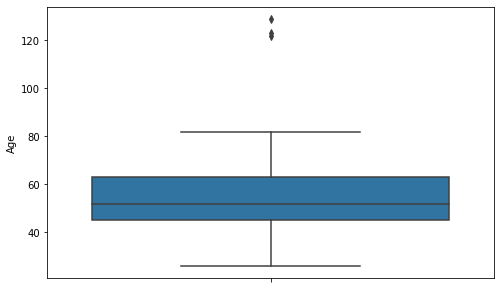

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(y=customer['Age']);

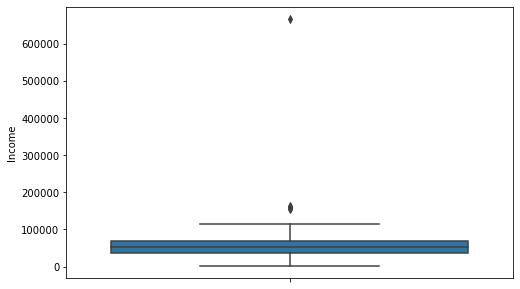

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(y=customer['Income']);

## Có khách hàng trên 100 tuổi, khách hàng có thu nhập trên 120000 nên loại trừ ra. 

In [15]:
customer = customer[customer['Age']<100]
customer = customer[customer['Income']<120000]
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Month_Customer,AgeGroup,Children,TotalSpendings
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,3,11,1,65,126,Senior Adult,0,1269
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,3,11,0,68,98,Senior Adult,2,18
2,4141,1965,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,57,110,Middle Age Adult,0,602
3,6182,1984,Graduation,Partner,26646.0,1,0,2014-10-02,26,11,...,0,0,3,11,0,38,96,Adult,1,35
4,5324,1981,PhD,Partner,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,41,105,Middle Age Adult,1,334


In [16]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2205 non-null   int64         
 1   Year_Birth           2205 non-null   int64         
 2   Education            2205 non-null   object        
 3   Marital_Status       2205 non-null   object        
 4   Income               2205 non-null   float64       
 5   Kidhome              2205 non-null   int64         
 6   Teenhome             2205 non-null   int64         
 7   Dt_Customer          2205 non-null   datetime64[ns]
 8   Recency              2205 non-null   int64         
 9   MntWines             2205 non-null   int64         
 10  MntFruits            2205 non-null   int64         
 11  MntMeatProducts      2205 non-null   int64         
 12  MntFishProducts      2205 non-null   int64         
 13  MntSweetProducts     2205 non-nul

In [17]:
maritalpending = customer.groupby('Marital_Status')['TotalSpendings'].mean().sort_values(ascending=False)
maritalpending = pd.DataFrame(list(maritalpending.items()), columns = ['Marital status','Average spending'])
maritalpending

,Marital status,Average spending
0,Single,512.081737
1,Partner,490.059775


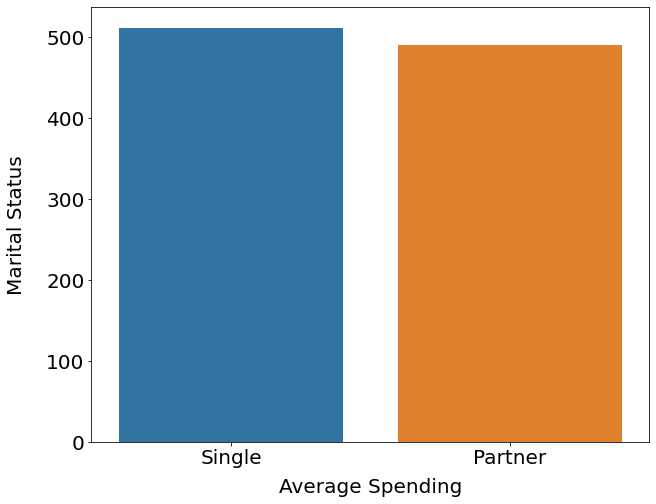

In [18]:
plt.figure(figsize=(10,8))
sns.barplot(data=maritalpending, x='Marital status', y='Average spending')
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
plt.xlabel('Average Spending', fontsize=20, labelpad=10)
plt.ylabel('Marital Status', fontsize=20, labelpad=20);

Nhìn vào số liệu ta thấy người độc thân tiêu dùng nhiều hơn người lập gia đình.

In [19]:
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Month_Customer,AgeGroup,Children,TotalSpendings
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,3,11,1,65,126,Senior Adult,0,1269
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,3,11,0,68,98,Senior Adult,2,18
2,4141,1965,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,57,110,Middle Age Adult,0,602
3,6182,1984,Graduation,Partner,26646.0,1,0,2014-10-02,26,11,...,0,0,3,11,0,38,96,Adult,1,35
4,5324,1981,PhD,Partner,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,41,105,Middle Age Adult,1,334


In [20]:
childrenspending = customer.groupby('Children')['TotalSpendings'].mean().sort_values(ascending=False)
childrenspending_df = pd.DataFrame(data=list(childrenspending.items()), columns=['No. of children', 'Average Spending'])
childrenspending_df

,No. of children,Average Spending
0,0,910.684713
1,1,387.377698
2,3,226.940000
3,2,201.937349


Text(0, 0.5, 'Average Spending')

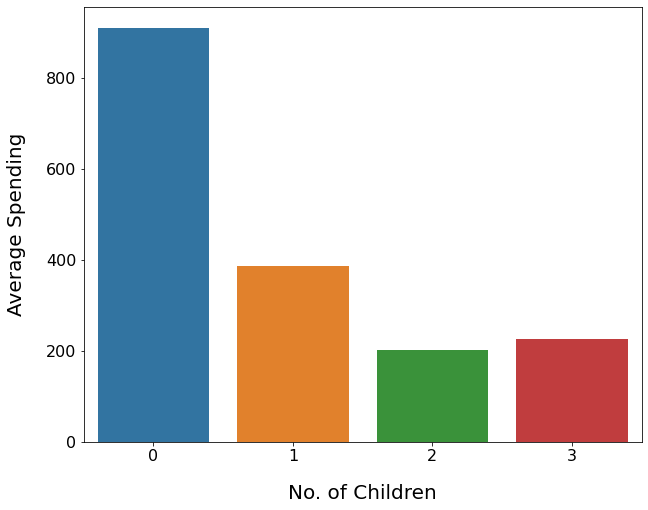

In [21]:
plt.figure(figsize=(10,8))
sns.barplot(data=childrenspending_df, x='No. of children', y='Average Spending')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('No. of Children', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20)

Nhìn vào chúng ta thấy
1. Khách hàng chưa có con sẽ tiêu dùng nhiều nhất
2. Khách hàng có 1 con sẽ tiêu dùng nhiều hơn có 2 và 3 con

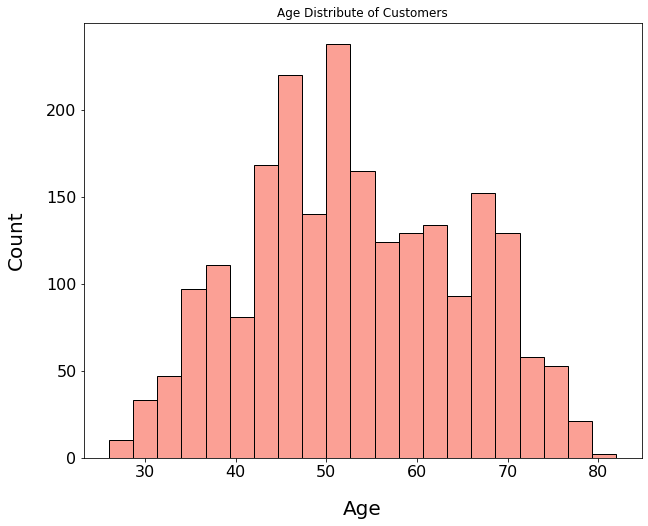

In [22]:
plt.figure(figsize=(10,8))
ax = sns.histplot(data=customer['Age'], color='salmon')
ax.set(title='Age Distribute of Customers')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Age', fontsize=20, labelpad=20)
plt.ylabel('Count', fontsize=20, labelpad=20);

Độ tuổi của khách hàng gần với phân phối chuẩn, nó dao động nhiều trong khoảng từ 40 đến 60 tuổi

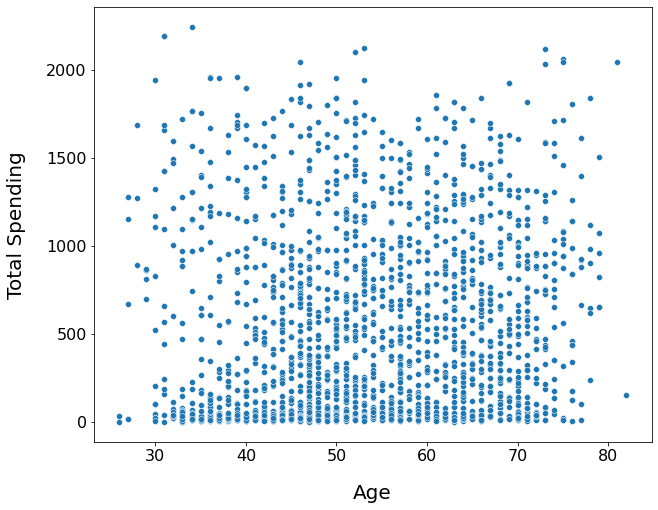

In [23]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=customer['Age'], y=customer['TotalSpendings'])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Age', fontsize=20, labelpad=20)
plt.ylabel('Total Spending', fontsize=20, labelpad=20);

Không thể thấy được sự tương quan rõ ràng giữa hai biến tuổi và tổng tiêu dùng

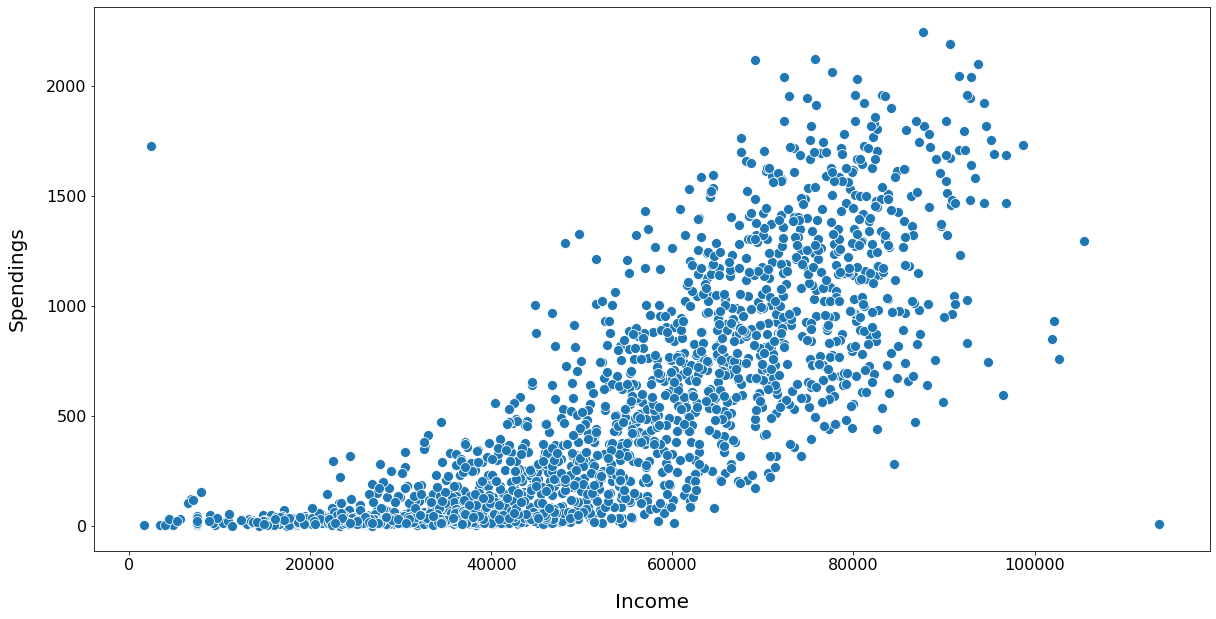

In [24]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=customer.Income, y=customer.TotalSpendings, s=100);
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

Nhìn vào ta thấy có sự tương quan giữa biến thu nhập và tiêu dùng. Khách hàng có thu nhập cao thì tiêu dùng sẽ cao.

In [25]:
customer.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Month_Customer,AgeGroup,Children,TotalSpendings
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,3,11,1,65,126,Senior Adult,0,1269
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,3,11,0,68,98,Senior Adult,2,18
2,4141,1965,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,57,110,Middle Age Adult,0,602
3,6182,1984,Graduation,Partner,26646.0,1,0,2014-10-02,26,11,...,0,0,3,11,0,38,96,Adult,1,35
4,5324,1981,PhD,Partner,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,41,105,Middle Age Adult,1,334


In [26]:
products = customer[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
products

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


In [27]:
product_mean = products.mean().sort_values(ascending=False)
product_mean_df = pd.DataFrame(list(product_mean.items()), columns=['Products', 'Average Spending'])
product_mean_df

,Products,Average Spending
0,MntWines,306.164626
1,MntMeatProducts,165.312018
2,MntGoldProds,44.057143
3,MntFishProducts,37.756463
4,MntSweetProducts,27.128345
5,MntFruits,26.403175


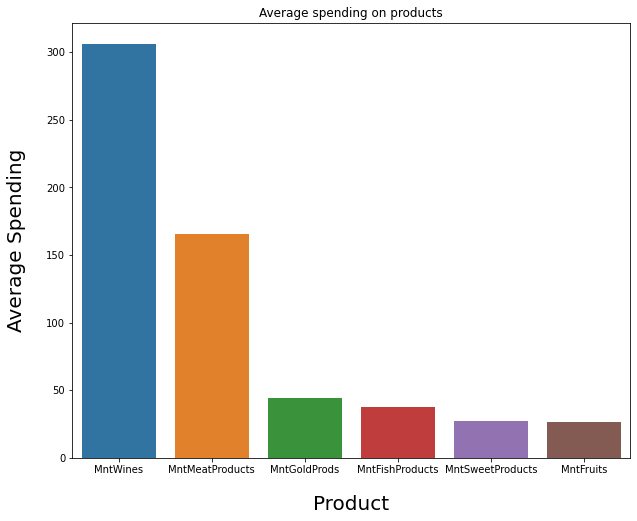

In [28]:
plt.figure(figsize=(10,8))
sns.barplot(data=product_mean_df, x='Products', y='Average Spending')
plt.title('Average spending on products')
plt.xlabel('Product', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

- Rượu (Wine) và thịt (Meat) là các sản phẩm được tiêu thụ nhiều nhất.
- Trái cây (Fruits) và Đồ ngọt (Sweet) được tiêu dùng ít nhất.